![](http://excellcrane.com/about/sepia_rig.png)

# Equipment Survival Analysis

### Survival analysis is a specific branch of data science which requires specific knowledge to master it. The author (Winson Loh) has been in the life science field more than 10 years. Please refer to the presentation slide "Predicting Equipment Survivability.pptx" in the same folder to understand the business need of this project and the introduction of survival analysis in data science.

### This technique can be used for bio/life science, insurance industry and analysi

In [ ]:
# Two packages have been used: Scikit-survival and lifelines
# Models used: Kaplan-Meier, Cox-PH, Weibull, Fast Survival Support Vector Machine
# Feature selection and pipelining techniques were demonstrated.

### Test Dataset (Year 2017)

In [4]:
import pandas as pd
import numpy as np
data_test = pd.read_excel("C:/Users/YLoh/Desktop/Datasets/New folder/Data_Test.xlsx", dtype={"Area": "category", "Environment": "category", "Tandem": "category"})
data_test = data_test.dropna()
data_test["Status"]=data_test["Status"].astype(bool)  #change the Status to Boolean. False = Survive, True = Dead
data_test_x = data_test.iloc[:,1:5]   #extract covariates as dataFrame

#Convert data_y to a np array with structured data type as needed to some survival model
data_test_y = np.array(list(zip(data_test.Status, data_test.RunDays)),dtype=([('Status', '?'), ('RunDays', '<f8')])) 

#Note: cannot use apply()
#data_y = pd.DataFrame(data[['Status', 'RunDays']].apply(tuple, axis=1))
#data_y = np.array(data_y)

print(data_test.head())
print(data_test_x.head())
print(data_test.info())
print(data_test.shape)
data_test_y

  Activity Date Area  Temperature        Environment Tandem  Status  RunDays
0    2017-01-02  MEA        132.8           Offshore     No   False      456
1    2017-01-02  MEA        132.8           Offshore     No   False      455
2    2017-01-09  LAM        202.0  Land_Conventional     No    True       31
3    2017-01-05  LAM        150.0  Land_Conventional     No   False      455
4    2017-01-02  LAM        220.0  Land_Conventional     No    True       18
  Area  Temperature        Environment Tandem
0  MEA        132.8           Offshore     No
1  MEA        132.8           Offshore     No
2  LAM        202.0  Land_Conventional     No
3  LAM        150.0  Land_Conventional     No
4  LAM        220.0  Land_Conventional     No
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2802 entries, 0 to 2974
Data columns (total 7 columns):
Activity Date    2802 non-null datetime64[ns]
Area             2802 non-null category
Temperature      2802 non-null float64
Environment      2802 non-null 

array([(False, 456.), (False, 455.), ( True,  31.), ..., (False, 186.),
       (False, 304.), (False, 156.)],
      dtype=[('Status', '?'), ('RunDays', '<f8')])

In [2]:
data_test.Status.value_counts()   #this show the ratio of the censored (False) and failure (True) data

False    2000
True      802
Name: Status, dtype: int64

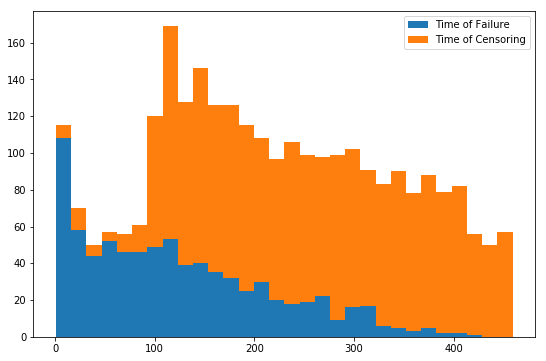

In [8]:
#Showing the distribution of the censored and failure data
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(9, 6))
val, bins, patches = plt.hist((data_test_y["RunDays"][data_test_y["Status"]],
                               data_test_y["RunDays"][~data_test_y["Status"]]),
                              bins=30, stacked=True)
plt.legend(patches, ["Time of Failure", "Time of Censoring"])

### Train Dataset (Year 2015 and 2016)

In [5]:
data_train = pd.read_excel("C:/Users/YLoh/Desktop/Datasets/New folder/Data_Train.xlsx", dtype={"Area": "category", "Environment": "category", "Tandem": "category"})
data_train = data_train.dropna()
data_train["Status"]=data_train["Status"].astype(bool)  #change the Status to Boolean. False = Survive, True = Dead
data_train_x = data_train.iloc[:,1:5]   #extract covariates as dataFrame

#Convert data_y to a np array with structured data type as needed to some survival model
data_train_y = np.array(list(zip(data_train.Status, data_train.RunDays)),dtype=([('Status', '?'), ('RunDays', '<f8')])) 

#Note: cannot use apply()
#data_y = pd.DataFrame(data[['Status', 'RunDays']].apply(tuple, axis=1))
#data_y = np.array(data_y)

print(data_train.head())
print(data_train_x.head())
print(data_train.info())
print(data_train.shape)
data_train_y

  Activity Date Area  Temperature        Environment Tandem  RunDays  Status
0    2015-03-14  MEA        160.0           Offshore      0      437    True
1    2015-02-03  MEA        200.0           Offshore      0      310    True
2    2015-01-08  MEA        195.0           Offshore      0     1183   False
3    2015-01-12  EAF        205.0           Offshore      1     1178   False
4    2015-01-01  MEA        190.0  Land_Conventional      0     1190   False
  Area  Temperature        Environment Tandem
0  MEA        160.0           Offshore      0
1  MEA        200.0           Offshore      0
2  MEA        195.0           Offshore      0
3  EAF        205.0           Offshore      1
4  MEA        190.0  Land_Conventional      0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5268 entries, 0 to 5623
Data columns (total 7 columns):
Activity Date    5268 non-null datetime64[ns]
Area             5268 non-null category
Temperature      5268 non-null float64
Environment      5268 non-null 

array([( True,  437.), ( True,  310.), (False, 1183.), ...,
       (False,  593.), (False,  154.), ( True,   95.)],
      dtype=[('Status', '?'), ('RunDays', '<f8')])

In [5]:
data_train.Status.value_counts() 

True     2855
False    2413
Name: Status, dtype: int64

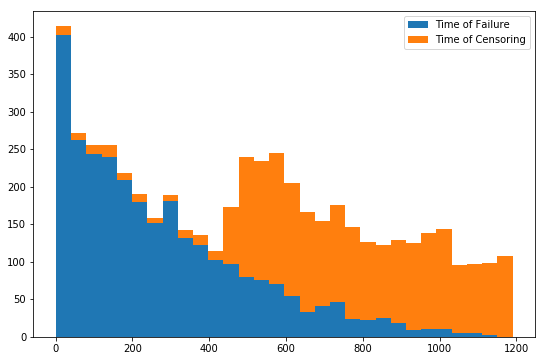

In [6]:
plt.figure(figsize=(9, 6))
val, bins, patches = plt.hist((data_train_y["RunDays"][data_train_y["Status"]],
                               data_train_y["RunDays"][~data_train_y["Status"]]),
                              bins=30, stacked=True)
plt.legend(patches, ["Time of Failure", "Time of Censoring"])

### Non Parametric Model

Text(0.5,0,'time $t$')

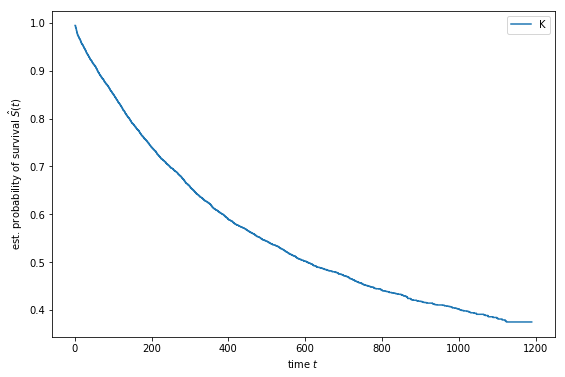

In [69]:
#Perform a non-paramtric plot using KM-method
%matplotlib inline
import matplotlib.pyplot as plt
from sksurv.nonparametric import kaplan_meier_estimator

time, survival_prob = kaplan_meier_estimator(data_train_y["Status"], data_train_y["RunDays"])
plt.figure(figsize=(9,6))
plt.step(time, survival_prob, where="post")
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")

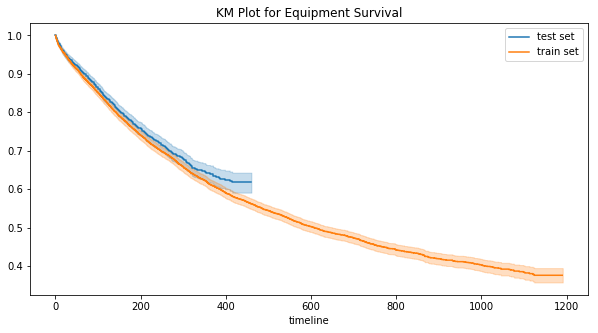

In [37]:
#Plot using lifelines package

from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(data_test["RunDays"], event_observed=data_test["Status"], label="test set")
ax=kmf.plot()
kmf.fit(data_train["RunDays"], event_observed=data_train["Status"], label="train set")
kmf.plot(ax=ax, title='KM Plot for Equipment Survival')

In [8]:
#survival function by Area
print(data_train_x["Area"].value_counts())
print(data_train_x.isnull().sum())

MEA    1746
LAM    1668
NAM    1468
EAF     282
RUS     104
Name: Area, dtype: int64
Area           0
Temperature    0
Environment    0
Tandem         0
dtype: int64


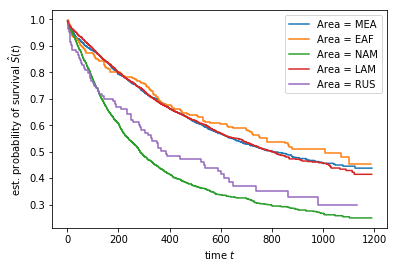

In [62]:
#check survivability by Area
for area in data_train_x["Area"].unique():
    area_select = data_train_x["Area"] == area
    time, survival_prob = kaplan_meier_estimator(
        data_train_y["Status"][area_select],
        data_train_y["RunDays"][area_select])
    
    plt.step(time, survival_prob, where="post",
             label="Area = %s" % area)

plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best")

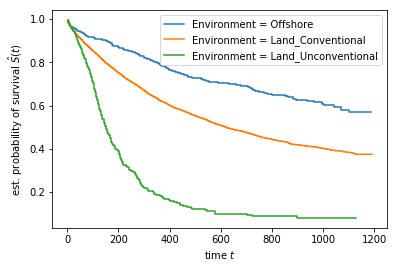

In [10]:
#check the impact of environment
for environment in ("Offshore", "Land_Conventional", "Land_Unconventional"):
    environment_select = data_train["Environment"] == environment
    time, survival_prob = kaplan_meier_estimator(
        data_train["Status"][environment_select],
        data_train["RunDays"][environment_select])
    
    plt.step(time, survival_prob, where="post",
             label="Environment = %s" % environment)

plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best")

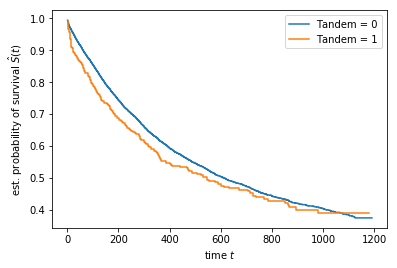

In [11]:
#check survivability by tandem
for tandem in data_train_x["Tandem"].unique():
    tandem_select = data_train_x["Tandem"] == tandem
    time, survival_prob = kaplan_meier_estimator(
        data_train_y["Status"][tandem_select],
        data_train_y["RunDays"][tandem_select])
    
    plt.step(time, survival_prob, where="post",
             label="Tandem = %s" % tandem)

plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best")

### Multivariate Survival Model

In [6]:
#convert the categorical variables in the data set into numeric values
from sksurv.preprocessing import OneHotEncoder

data_train_x_numeric = OneHotEncoder().fit_transform(data_train_x)
data_train_x_numeric.head()

,Area=LAM,Area=MEA,Area=NAM,Area=RUS,Temperature,Environment=Land_Unconventional,Environment=Offshore,Tandem=1
0,0.0,1.0,0.0,0.0,160.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,200.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,195.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,205.0,0.0,1.0,1.0
4,0.0,1.0,0.0,0.0,190.0,0.0,0.0,0.0


In [7]:
data_train_x_numeric.columns

Index(['Area=LAM', 'Area=MEA', 'Area=NAM', 'Area=RUS', 'Temperature',
       'Environment=Land_Unconventional', 'Environment=Offshore', 'Tandem=1'],
      dtype='object')

In [14]:
#Survival models in scikit-survival follow the same rules as estimators in scikit-learn,
#i.e., they have a fit method, which expects a data matrix and a structered array of survival times 
#and binary event indicators.
from sksurv.linear_model import CoxPHSurvivalAnalysis
import numpy as np
estimator = CoxPHSurvivalAnalysis()
estimator.fit(data_train_x_numeric, data_train_y)

CoxPHSurvivalAnalysis(alpha=0, n_iter=100, tol=1e-09, verbose=0)

In [40]:
#The result is a vector of coefficients, one for each variable, where each value corresponds to the log hazard ratio.
pd.Series(estimator.coef_, index=data_train_x_numeric.columns)

Area=LAM                          -0.145559
Area=MEA                          -0.087834
Area=NAM                           0.501867
Area=RUS                           0.421821
Temperature                        0.003415
Environment=Land_Unconventional    0.587808
Environment=Offshore              -0.612307
Tandem=1                           0.218402
dtype: float64

In [46]:
estimator.baseline_survival_

array([1.000e+00, 2.000e+00, 3.000e+00, ..., 1.188e+03, 1.189e+03,
       1.190e+03])

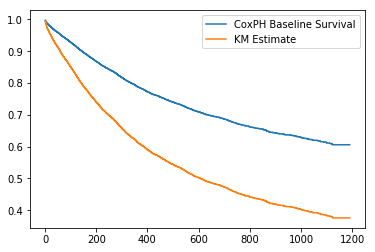

In [84]:
#Compare the CoxPH baseline survival plot with KM plot
#Interpretation: a small spread between these two curves means that the impact of the exponential in the Cox model does very little, 
#whereas a large spread means most of the changes in individual hazard can be attributed to the exponential term. 
#For example, the large spread of the below graph indicate a good fit

plt.step(estimator.baseline_survival_.x, estimator.baseline_survival_.y)
time, survival_prob = kaplan_meier_estimator(data_train_y["Status"], data_train_y["RunDays"])
plt.step(time, survival_prob, where="post")
plt.legend(["CoxPH Baseline Survival","KM Estimate"])

### Prediction and Analysis

In [15]:
#Using the fitted model, we can predict a patient-specific survival function, by passing an appropriate data matrix 
#to the estimator's predict_survival_function method. First, let's create a set of four synthetic usage condition.

x_new = pd.DataFrame.from_items(
    [(1, [0, 0, 1, 0, 250, 0, 1, 1]),
     (2, [0, 0, 1, 0, 300, 0, 1, 0]),
     (3, [0, 1, 0, 0, 250, 0, 1, 1]),
     (4, [0, 1, 0, 0, 300, 0, 1, 0])],
     columns=data_train_x_numeric.columns, orient='index')
x_new



,Area=LAM,Area=MEA,Area=NAM,Area=RUS,Temperature,Environment=Land_Unconventional,Environment=Offshore,Tandem=1
1,0,0,1,0,250,0,1,1
2,0,0,1,0,300,0,1,0
3,0,1,0,0,250,0,1,1
4,0,1,0,0,300,0,1,0


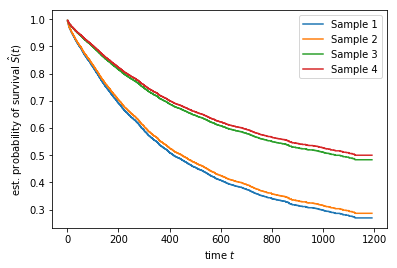

In [16]:
#Similar to kaplan_meier_estimator, the predict_survival_function method returns a sequence of step functions
pred_surv = estimator.predict_survival_function(x_new)
for i, c in enumerate(pred_surv):
    plt.step(c.x, c.y, where="post", label="Sample %d" % (i + 1))
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best")

In [9]:
#Pre-processing test set for prediction
data_test_x_numeric = OneHotEncoder().fit_transform(data_test_x)

In [10]:
#Measure performance of survival model using c-index
#a value of 0.5 denotes a random model,
#a value of 1.0 denotes a perfect model,
#a value of 0.0 denotes a perfectly wrong model.

from sksurv.metrics import concordance_index_censored

prediction = estimator.predict(data_test_x_numeric)
result = concordance_index_censored(data_test_y["Status"], data_test_y["RunDays"], prediction)
result[0]

0.6285746380642712

In [19]:
#Alternative method
estimator.score(data_test_x_numeric, data_test_y)

0.6285746380642712

In [126]:
#Let's try cross validation. It is from lifelines package. 
from lifelines import CoxPHFitter
from lifelines.utils import k_fold_cross_validation
data_train=data_train.dropna()
data_train_numeric = pd.concat([OneHotEncoder().fit_transform(data_train.iloc[:,1:5]),data_train.iloc[:,5:7]],axis=1)
data_train_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5268 entries, 0 to 5623
Data columns (total 10 columns):
Area=LAM                           5268 non-null float64
Area=MEA                           5268 non-null float64
Area=NAM                           5268 non-null float64
Area=RUS                           5268 non-null float64
Temperature                        5268 non-null float64
Environment=Land_Unconventional    5268 non-null float64
Environment=Offshore               5268 non-null float64
Tandem=1                           5268 non-null float64
RunDays                            5268 non-null int64
Status                             5268 non-null bool
dtypes: bool(1), float64(8), int64(1)
memory usage: 416.7 KB


In [127]:
data_train_numeric.head()

,Area=LAM,Area=MEA,Area=NAM,Area=RUS,Temperature,Environment=Land_Unconventional,Environment=Offshore,Tandem=1,RunDays,Status
0,0.0,1.0,0.0,0.0,160.0,0.0,1.0,0.0,437,True
1,0.0,1.0,0.0,0.0,200.0,0.0,1.0,0.0,310,True
2,0.0,1.0,0.0,0.0,195.0,0.0,1.0,0.0,1183,False
3,0.0,0.0,0.0,0.0,205.0,0.0,1.0,1.0,1178,False
4,0.0,1.0,0.0,0.0,190.0,0.0,0.0,0.0,1190,False


In [129]:
#Let's try cross validation. 
cph = CoxPHFitter()
scores = k_fold_cross_validation(cph, data_train_numeric, 'RunDays', event_col='Status', k=5)
print(scores)
print(np.mean(scores))

[0.6363770639447613, 0.6228859724107876, 0.6395278486986193, 0.6255527250008476, 0.6324923668300753]
0.6313671953770182


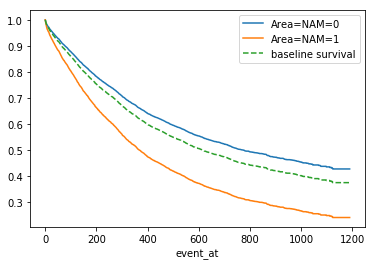

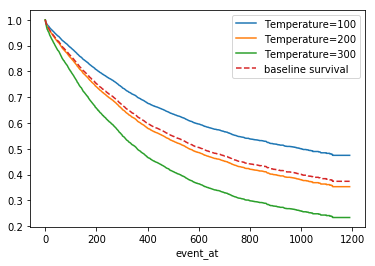

In [135]:
#Example of checking the impact of a specific variable while keeping other variables constant 
cph.plot_covariate_groups('Area=NAM',[0,1])
cph.plot_covariate_groups('Temperature',[100,200,300])

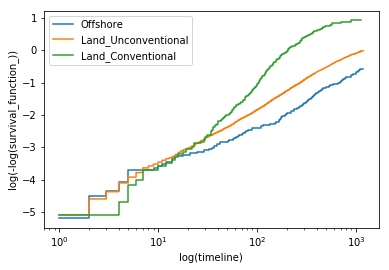

In [145]:
#Check the proportional hazard assumption
from lifelines import KaplanMeierFitter

fig, axes = plt.subplots()
for environment in data_train["Environment"].unique():
    environment_select = data_train.loc[data_train["Environment"] == environment]
    kmf = KaplanMeierFitter()
    kmf.fit(environment_select['RunDays'], event_observed=environment_select['Status'])
    kmf.plot_loglogs(ax=axes)

axes.legend(['Offshore', 'Land_Unconventional', 'Land_Conventional'])

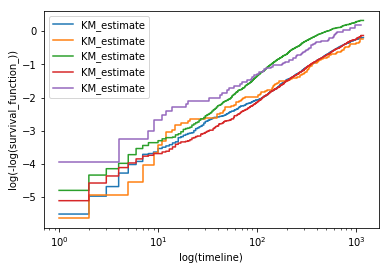

In [143]:
#Check the proportional hazard assumption
fig, axes = plt.subplots()
for area in data_train["Area"].unique():
    area_select = data_train.loc[data_train["Area"] == area]
    kmf = KaplanMeierFitter()
    kmf.fit(area_select['RunDays'], event_observed=area_select['Status'])
    kmf.plot_loglogs(ax=axes, label="Area = %s" % area)

axes.legend(['MEA', 'EAF', 'NAM', 'LAM', 'RUS'])
plt.legend(loc="best")
plt.show()

In [156]:
#Remark: Proportional hazard assumption doees not hold well. Perfect one should be parallel lines.
#We can allow a factor without estimating its effect to be adjusted. Example, we can take out the environment factors
from lifelines import CoxPHFitter
cph = CoxPHFitter()
cph.fit(data_train_numeric, 'RunDays', event_col='Status', strata=['Environment=Land_Unconventional','Environment=Offshore'], show_progress=True)

cph.print_summary()

Iteration 1: norm_delta = 0.31793, step_size = 0.95000, ll = -21425.74415, seconds_since_start = 0.2
Iteration 2: norm_delta = 0.00964, step_size = 0.95000, ll = -21321.92216, seconds_since_start = 0.4
Iteration 3: norm_delta = 0.00046, step_size = 0.95000, ll = -21321.74673, seconds_since_start = 0.6
Iteration 4: norm_delta = 0.00002, step_size = 0.95000, ll = -21321.74631, seconds_since_start = 0.7
Iteration 5: norm_delta = 0.00000, step_size = 0.95000, ll = -21321.74631, seconds_since_start = 0.9
Convergence completed after 5 iterations.
n=5268, number of events=2855

               coef  exp(coef)  se(coef)       z      p  lower 0.95  upper 0.95     
Area=LAM    -0.1451     0.8649    0.0979 -1.4828 0.1381     -0.3369      0.0467     
Area=MEA    -0.0869     0.9167    0.0967 -0.8988 0.3688     -0.2765      0.1027     
Area=NAM     0.4995     1.6479    0.0976  5.1168 0.0000      0.3082      0.6908  ***
Area=RUS     0.4190     1.5204    0.1574  2.6616 0.0078      0.1104      0.7275   

### Feature Selection

In [25]:
#Feature selection, we fit a Cox model to each variable individually and record the c-index on the training set.
import numpy as np

def fit_and_score_features(X, y):
    n_features = X.shape[1]
    scores = np.empty(n_features)
    m = CoxPHSurvivalAnalysis()
    for j in range(n_features):
        Xj = X[:, j:j+1]
        m.fit(Xj, y)
        scores[j] = m.score(Xj, y)
    return scores

scores = fit_and_score_features(data_train_x_numeric.values, data_train_y)
pd.Series(scores, index=data_train_x_numeric.columns).sort_values(ascending=False)

Area=NAM                           0.571992
Temperature                        0.550102
Environment=Land_Unconventional    0.538920
Area=LAM                           0.534199
Area=MEA                           0.534049
Environment=Offshore               0.528925
Tandem=1                           0.504790
Area=RUS                           0.503129
dtype: float64

In [26]:
#build a parsimonious model by excluding irrelevant features. 
#We could use the ranking from above, but would need to determine what the optimal cut-off should be. 
#scikit-learn has built-in support for performing grid search.

#First, we create a pipeline that puts all the parts together.

from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline

pipe = Pipeline([('encode', OneHotEncoder()),
                 ('select', SelectKBest(fit_and_score_features, k=3)),
                 ('model', CoxPHSurvivalAnalysis())])
#define the range of parameters we want to explore during grid search
#optimize the parameter k of the SelectKBest class 

from sklearn.model_selection import GridSearchCV

param_grid = {'select__k': np.arange(1, data_train_x_numeric.shape[1] + 1)}
gcv = GridSearchCV(pipe, param_grid, return_train_score=True)
gcv.fit(data_train_x, data_train_y)

pd.DataFrame(gcv.cv_results_).sort_values(by='mean_test_score', ascending=False)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_select__k,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
7,2.997529,0.033692,0.630568,0.633312,8,{'select__k': 8},1,0.628669,0.630800,0.627321,0.637305,0.635713,0.631831,0.142492,0.000471,0.003680,0.002855
6,3.032889,0.036695,0.629937,0.631990,7,{'select__k': 7},2,0.626606,0.629997,0.625956,0.636339,0.637250,0.629634,0.117272,0.001249,0.005178,0.003079
5,2.988516,0.034360,0.628771,0.631127,6,{'select__k': 6},3,0.626091,0.629746,0.625120,0.634867,0.635102,0.628770,0.097591,0.001248,0.004494,0.002674
4,2.998549,0.035024,0.623112,0.624986,5,{'select__k': 5},4,0.617860,0.622787,0.615819,0.624818,0.635658,0.627352,0.154031,0.000819,0.008910,0.001868
2,2.981518,0.034691,0.620262,0.621013,3,{'select__k': 3},5,0.618138,0.622095,0.614658,0.624000,0.627990,0.616946,0.183547,0.000945,0.005646,0.002980
1,2.910801,0.034690,0.618509,0.619060,2,{'select__k': 2},6,0.615738,0.620707,0.614914,0.621013,0.624876,0.615460,0.128706,0.000472,0.004514,0.002549
3,2.987189,0.034368,0.618069,0.620935,4,{'select__k': 4},7,0.614060,0.621619,0.614821,0.623516,0.625326,0.617670,0.121197,0.001245,0.005141,0.002435
0,3.143631,0.037027,0.571465,0.571871,1,{'select__k': 1},8,0.559590,0.577924,0.570845,0.572361,0.583960,0.565328,0.249790,0.002161,0.009959,0.005154


In [ ]:
#The results show that all 8 features giving the best score

In [27]:
pipe.set_params(**gcv.best_params_)
pipe.fit(data_train_x, data_train_y)

encoder, transformer, final_estimator = [s[1] for s in pipe.steps]
pd.Series(final_estimator.coef_, index=encoder.encoded_columns_[transformer.get_support()])

Area=LAM                          -0.145559
Area=MEA                          -0.087834
Area=NAM                           0.501867
Area=RUS                           0.421821
Temperature                        0.003415
Environment=Land_Unconventional    0.587808
Environment=Offshore              -0.612307
Tandem=1                           0.218402
dtype: float64

In [28]:
#Use another model: Cox regression with Elastic Net
from sksurv.linear_model import CoxnetSurvivalAnalysis

In [29]:
estimator_CoxNet = CoxnetSurvivalAnalysis()
estimator_CoxNet.fit(data_train_x_numeric, data_train_y)
estimator_CoxNet.score(data_test_x_numeric, data_test_y)   #Result is poorer

0.5081053212519185

### Try Fast Survival Support Vector Machine

In [9]:
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sksurv.svm import FastSurvivalSVM
import seaborn as sns
sns.set_style("whitegrid")

In [27]:
estimator_FSVM = FastSurvivalSVM(optimizer="rbtree", max_iter=10, tol=1e-6, random_state=0)

In [10]:
from sksurv.metrics import concordance_index_censored
def score_survival_model(model, X, y):
    prediction = model.predict(X)
    result = concordance_index_censored(y['Status'], y['RunDays'], prediction)
    return result[0]

In [29]:
param_grid = {'alpha': 2. ** np.arange(-12, 13, 2)}
cv = ShuffleSplit(n_splits=200, test_size=0.5, random_state=0)
gcv = GridSearchCV(estimator_FSVM, param_grid, scoring=score_survival_model,
                   n_jobs=1, iid=False, refit=False,
                   cv=cv, verbose=5)

In [30]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
gcv = gcv.fit(data_train_x_numeric, data_train_y)

Fitting 200 folds for each of 13 candidates, totalling 2600 fits
[CV] alpha=0.000244140625 ............................................
[CV] ... alpha=0.000244140625, score=0.6315600726719426, total=   0.9s
[CV] alpha=0.000244140625 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] ... alpha=0.000244140625, score=0.6279104088998424, total=   0.4s
[CV] alpha=0.000244140625 ............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


[CV] ... alpha=0.000244140625, score=0.6232554983548351, total=   0.9s
[CV] alpha=0.000244140625 ............................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.6s remaining:    0.0s


[CV] ... alpha=0.000244140625, score=0.6305739582138303, total=   0.7s
[CV] alpha=0.000244140625 ............................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.4s remaining:    0.0s


[CV] ... alpha=0.000244140625, score=0.6322894401561733, total=   0.5s
[CV] alpha=0.000244140625 ............................................
[CV] ... alpha=0.000244140625, score=0.6369279392730826, total=   0.7s
[CV] alpha=0.000244140625 ............................................
[CV] ... alpha=0.000244140625, score=0.6323667143520099, total=   1.0s
[CV] alpha=0.000244140625 ............................................
[CV] ... alpha=0.000244140625, score=0.6286837945246834, total=   0.3s
[CV] alpha=0.000244140625 ............................................
[CV] ... alpha=0.000244140625, score=0.6201304509284026, total=   0.9s
[CV] alpha=0.000244140625 ............................................
[CV] ... alpha=0.000244140625, score=0.6279907117159285, total=   0.7s
[CV] alpha=0.000244140625 ............................................
[CV] ... alpha=0.000244140625, score=0.6319856973615348, total=   0.9s
[CV] alpha=0.000244140625 ............................................
[CV] .

[CV] ... alpha=0.000244140625, score=0.6380243863218302, total=   0.9s
[CV] alpha=0.000244140625 ............................................
[CV] ... alpha=0.000244140625, score=0.6319347625988625, total=   0.7s
[CV] alpha=0.000244140625 ............................................
[CV] ... alpha=0.000244140625, score=0.6329296466741489, total=   0.7s
[CV] alpha=0.000244140625 ............................................
[CV] ... alpha=0.000244140625, score=0.6199376976966515, total=   0.6s
[CV] alpha=0.000244140625 ............................................
[CV] ... alpha=0.000244140625, score=0.6306450909708374, total=   0.7s
[CV] alpha=0.000244140625 ............................................
[CV] .... alpha=0.000244140625, score=0.638106219853231, total=   0.7s
[CV] alpha=0.000244140625 ............................................
[CV] .... alpha=0.000244140625, score=0.625494582933014, total=   0.7s
[CV] alpha=0.000244140625 ............................................
[CV] .

[CV] ... alpha=0.000244140625, score=0.6211610243797786, total=   0.4s
[CV] alpha=0.000244140625 ............................................
[CV] ... alpha=0.000244140625, score=0.6381337046585909, total=   0.8s
[CV] alpha=0.000244140625 ............................................
[CV] ... alpha=0.000244140625, score=0.6351622576458461, total=   0.9s
[CV] alpha=0.000244140625 ............................................
[CV] ... alpha=0.000244140625, score=0.6443869374984531, total=   0.8s
[CV] alpha=0.000244140625 ............................................
[CV] ... alpha=0.000244140625, score=0.6345347030133612, total=   0.7s
[CV] alpha=0.000244140625 ............................................
[CV] ... alpha=0.000244140625, score=0.6319289392775237, total=   0.8s
[CV] alpha=0.000244140625 ............................................
[CV] ... alpha=0.000244140625, score=0.6165714394191215, total=   0.3s
[CV] alpha=0.000244140625 ............................................
[CV] .

[CV] ... alpha=0.000244140625, score=0.6353169267636802, total=   0.9s
[CV] alpha=0.000244140625 ............................................
[CV] ... alpha=0.000244140625, score=0.6287924020264765, total=   0.7s
[CV] alpha=0.000244140625 ............................................
[CV] ... alpha=0.000244140625, score=0.6308003505702157, total=   0.7s
[CV] alpha=0.000244140625 ............................................
[CV] .... alpha=0.000244140625, score=0.622572068273766, total=   0.7s
[CV] alpha=0.000244140625 ............................................
[CV] ... alpha=0.000244140625, score=0.6277744522879691, total=   1.0s
[CV] alpha=0.000244140625 ............................................
[CV] ... alpha=0.000244140625, score=0.6282390244497547, total=   0.7s
[CV] alpha=0.000244140625 ............................................
[CV] .... alpha=0.000244140625, score=0.631180999932383, total=   0.7s
[CV] alpha=0.000244140625 ............................................
[CV] .

[CV] ..... alpha=0.0009765625, score=0.6315240798244383, total=   0.9s
[CV] alpha=0.0009765625 ..............................................
[CV] ..... alpha=0.0009765625, score=0.6257480398163957, total=   0.7s
[CV] alpha=0.0009765625 ..............................................
[CV] ........ alpha=0.0009765625, score=0.6326674023018, total=   0.7s
[CV] alpha=0.0009765625 ..............................................
[CV] ..... alpha=0.0009765625, score=0.6247994227190284, total=   0.6s
[CV] alpha=0.0009765625 ..............................................
[CV] ..... alpha=0.0009765625, score=0.6321046211229261, total=   0.7s
[CV] alpha=0.0009765625 ..............................................
[CV] ..... alpha=0.0009765625, score=0.6265783359546236, total=   0.6s
[CV] alpha=0.0009765625 ..............................................
[CV] ..... alpha=0.0009765625, score=0.6353218440178061, total=   0.8s
[CV] alpha=0.0009765625 ..............................................
[CV] .

[CV] ...... alpha=0.0009765625, score=0.631427545655638, total=   0.7s
[CV] alpha=0.0009765625 ..............................................
[CV] ..... alpha=0.0009765625, score=0.6309264461388523, total=   0.6s
[CV] alpha=0.0009765625 ..............................................
[CV] ..... alpha=0.0009765625, score=0.6229967501445535, total=   0.6s
[CV] alpha=0.0009765625 ..............................................
[CV] ..... alpha=0.0009765625, score=0.6237586134090866, total=   0.7s
[CV] alpha=0.0009765625 ..............................................
[CV] ..... alpha=0.0009765625, score=0.6276435457653288, total=   0.7s
[CV] alpha=0.0009765625 ..............................................
[CV] ..... alpha=0.0009765625, score=0.6279617202341421, total=   0.6s
[CV] alpha=0.0009765625 ..............................................
[CV] ..... alpha=0.0009765625, score=0.6322146570961791, total=   0.7s
[CV] alpha=0.0009765625 ..............................................
[CV] .

[CV] ..... alpha=0.0009765625, score=0.6238480513452029, total=   0.7s
[CV] alpha=0.0009765625 ..............................................
[CV] ..... alpha=0.0009765625, score=0.6397271619806169, total=   0.9s
[CV] alpha=0.0009765625 ..............................................
[CV] ..... alpha=0.0009765625, score=0.6258618739736411, total=   0.6s
[CV] alpha=0.0009765625 ..............................................
[CV] ..... alpha=0.0009765625, score=0.6323956477523838, total=   0.7s
[CV] alpha=0.0009765625 ..............................................
[CV] ..... alpha=0.0009765625, score=0.6347380051051685, total=   0.7s
[CV] alpha=0.0009765625 ..............................................
[CV] ..... alpha=0.0009765625, score=0.6302435871336312, total=   0.8s
[CV] alpha=0.0009765625 ..............................................
[CV] ..... alpha=0.0009765625, score=0.6250399381823015, total=   0.4s
[CV] alpha=0.0009765625 ..............................................
[CV] .

[CV] ....... alpha=0.00390625, score=0.6320041961394592, total=   0.7s
[CV] alpha=0.00390625 ................................................
[CV] ....... alpha=0.00390625, score=0.6232171639607731, total=   0.8s
[CV] alpha=0.00390625 ................................................
[CV] ....... alpha=0.00390625, score=0.6192175559898255, total=   0.4s
[CV] alpha=0.00390625 ................................................
[CV] ....... alpha=0.00390625, score=0.6336050281403741, total=   1.0s
[CV] alpha=0.00390625 ................................................
[CV] ....... alpha=0.00390625, score=0.6337954891144392, total=   0.9s
[CV] alpha=0.00390625 ................................................
[CV] ........ alpha=0.00390625, score=0.627763346212877, total=   0.7s
[CV] alpha=0.00390625 ................................................
[CV] ....... alpha=0.00390625, score=0.6306240723887936, total=   0.7s
[CV] alpha=0.00390625 ................................................
[CV] .

[CV] ....... alpha=0.00390625, score=0.6255646668989963, total=   0.7s
[CV] alpha=0.00390625 ................................................
[CV] ....... alpha=0.00390625, score=0.6218158326656479, total=   0.7s
[CV] alpha=0.00390625 ................................................
[CV] ........ alpha=0.00390625, score=0.617500447462123, total=   0.9s
[CV] alpha=0.00390625 ................................................
[CV] ....... alpha=0.00390625, score=0.6266006879327015, total=   0.7s
[CV] alpha=0.00390625 ................................................
[CV] ....... alpha=0.00390625, score=0.6271641269958382, total=   0.8s
[CV] alpha=0.00390625 ................................................
[CV] ....... alpha=0.00390625, score=0.6330812855176527, total=   0.7s
[CV] alpha=0.00390625 ................................................
[CV] ....... alpha=0.00390625, score=0.6334169424304587, total=   0.7s
[CV] alpha=0.00390625 ................................................
[CV] .

[CV] ....... alpha=0.00390625, score=0.6164920188098996, total=   0.3s
[CV] alpha=0.00390625 ................................................
[CV] ....... alpha=0.00390625, score=0.6290512999993401, total=   0.7s
[CV] alpha=0.00390625 ................................................
[CV] ....... alpha=0.00390625, score=0.6345924234083401, total=   0.7s
[CV] alpha=0.00390625 ................................................
[CV] ....... alpha=0.00390625, score=0.6275853245551664, total=   0.7s
[CV] alpha=0.00390625 ................................................
[CV] ....... alpha=0.00390625, score=0.6249081668040679, total=   0.8s
[CV] alpha=0.00390625 ................................................
[CV] ....... alpha=0.00390625, score=0.6371655861163926, total=   1.1s
[CV] alpha=0.00390625 ................................................
[CV] ......... alpha=0.00390625, score=0.64129824257884, total=   0.9s
[CV] alpha=0.00390625 ................................................
[CV] .

[CV] ....... alpha=0.00390625, score=0.6311683217462396, total=   0.6s
[CV] alpha=0.00390625 ................................................
[CV] ....... alpha=0.00390625, score=0.6283109991992514, total=   0.7s
[CV] alpha=0.00390625 ................................................
[CV] ....... alpha=0.00390625, score=0.6290070380961873, total=   0.8s
[CV] alpha=0.00390625 ................................................
[CV] ....... alpha=0.00390625, score=0.6235219322717713, total=   0.7s
[CV] alpha=0.00390625 ................................................
[CV] ....... alpha=0.00390625, score=0.6337878436998273, total=   0.6s
[CV] alpha=0.00390625 ................................................
[CV] ....... alpha=0.00390625, score=0.6270109655740715, total=   0.8s
[CV] alpha=0.00390625 ................................................
[CV] ....... alpha=0.00390625, score=0.6410566681393454, total=   0.6s
[CV] alpha=0.00390625 ................................................
[CV] .

[CV] ......... alpha=0.015625, score=0.6353703849954445, total=   0.8s
[CV] alpha=0.015625 ..................................................
[CV] ......... alpha=0.015625, score=0.6350427937938259, total=   0.8s
[CV] alpha=0.015625 ..................................................
[CV] ......... alpha=0.015625, score=0.6312726412088806, total=   0.6s
[CV] alpha=0.015625 ..................................................
[CV] ......... alpha=0.015625, score=0.6260646602607227, total=   0.7s
[CV] alpha=0.015625 ..................................................
[CV] ......... alpha=0.015625, score=0.6342735747541415, total=   0.7s
[CV] alpha=0.015625 ..................................................
[CV] ......... alpha=0.015625, score=0.6153144712619047, total=   0.3s
[CV] alpha=0.015625 ..................................................
[CV] ......... alpha=0.015625, score=0.6278749861180918, total=   0.6s
[CV] alpha=0.015625 ..................................................
[CV] .

[CV] ......... alpha=0.015625, score=0.6322035718845395, total=   0.8s
[CV] alpha=0.015625 ..................................................
[CV] ......... alpha=0.015625, score=0.6360209819006092, total=   0.8s
[CV] alpha=0.015625 ..................................................
[CV] ......... alpha=0.015625, score=0.6242835279340052, total=   0.8s
[CV] alpha=0.015625 ..................................................
[CV] ......... alpha=0.015625, score=0.6368925641322044, total=   0.6s
[CV] alpha=0.015625 ..................................................
[CV] ......... alpha=0.015625, score=0.6282579804217369, total=   0.7s
[CV] alpha=0.015625 ..................................................
[CV] ......... alpha=0.015625, score=0.6317659768241772, total=   0.3s
[CV] alpha=0.015625 ..................................................
[CV] ......... alpha=0.015625, score=0.6315580997962783, total=   0.9s
[CV] alpha=0.015625 ..................................................
[CV] .

[CV] .......... alpha=0.015625, score=0.625041104260617, total=   0.4s
[CV] alpha=0.015625 ..................................................
[CV] ......... alpha=0.015625, score=0.6329998005490091, total=   0.7s
[CV] alpha=0.015625 ..................................................
[CV] ......... alpha=0.015625, score=0.6238645729684024, total=   0.3s
[CV] alpha=0.015625 ..................................................
[CV] ......... alpha=0.015625, score=0.6314279675671521, total=   0.7s
[CV] alpha=0.015625 ..................................................
[CV] ......... alpha=0.015625, score=0.6318587977515624, total=   0.7s
[CV] alpha=0.015625 ..................................................
[CV] ......... alpha=0.015625, score=0.6384418015564967, total=   0.9s
[CV] alpha=0.015625 ..................................................
[CV] ......... alpha=0.015625, score=0.6370549468296561, total=   0.7s
[CV] alpha=0.015625 ..................................................
[CV] .

[CV] ........... alpha=0.0625, score=0.6306141473306174, total=   0.9s
[CV] alpha=0.0625 ....................................................
[CV] ........... alpha=0.0625, score=0.6197792446141489, total=   0.7s
[CV] alpha=0.0625 ....................................................
[CV] ........... alpha=0.0625, score=0.6319138264910922, total=   0.8s
[CV] alpha=0.0625 ....................................................
[CV] ........... alpha=0.0625, score=0.6318839975156891, total=   0.3s
[CV] alpha=0.0625 ....................................................
[CV] ............ alpha=0.0625, score=0.621444473615327, total=   0.8s
[CV] alpha=0.0625 ....................................................
[CV] ........... alpha=0.0625, score=0.6286787702765381, total=   0.4s
[CV] alpha=0.0625 ....................................................
[CV] ........... alpha=0.0625, score=0.6300027619836758, total=   0.8s
[CV] alpha=0.0625 ....................................................
[CV] .

[CV] ........... alpha=0.0625, score=0.6334223774746921, total=   0.7s
[CV] alpha=0.0625 ....................................................
[CV] ........... alpha=0.0625, score=0.6292546520932358, total=   0.7s
[CV] alpha=0.0625 ....................................................
[CV] ........... alpha=0.0625, score=0.6314370548832233, total=   0.7s
[CV] alpha=0.0625 ....................................................
[CV] ........... alpha=0.0625, score=0.6315401221406597, total=   0.7s
[CV] alpha=0.0625 ....................................................
[CV] ........... alpha=0.0625, score=0.6299368893682858, total=   0.7s
[CV] alpha=0.0625 ....................................................
[CV] ........... alpha=0.0625, score=0.6340711805055275, total=   0.8s
[CV] alpha=0.0625 ....................................................
[CV] ........... alpha=0.0625, score=0.6284390236703167, total=   1.0s
[CV] alpha=0.0625 ....................................................
[CV] .

[CV] ........... alpha=0.0625, score=0.6413311215688915, total=   0.7s
[CV] alpha=0.0625 ....................................................
[CV] ........... alpha=0.0625, score=0.6236702329537381, total=   0.6s
[CV] alpha=0.0625 ....................................................
[CV] ........... alpha=0.0625, score=0.6266236473014595, total=   0.7s
[CV] alpha=0.0625 ....................................................
[CV] ........... alpha=0.0625, score=0.6352339175563626, total=   0.7s
[CV] alpha=0.0625 ....................................................
[CV] ........... alpha=0.0625, score=0.6336521810642488, total=   0.7s
[CV] alpha=0.0625 ....................................................
[CV] ........... alpha=0.0625, score=0.6354635379140364, total=   0.7s
[CV] alpha=0.0625 ....................................................
[CV] ............ alpha=0.0625, score=0.620858458620324, total=   0.4s
[CV] alpha=0.0625 ....................................................
[CV] .

[CV] ........... alpha=0.0625, score=0.6410524385137403, total=   0.7s
[CV] alpha=0.0625 ....................................................
[CV] ........... alpha=0.0625, score=0.6386814948726643, total=   0.7s
[CV] alpha=0.0625 ....................................................
[CV] ........... alpha=0.0625, score=0.6235987214273537, total=   0.6s
[CV] alpha=0.0625 ....................................................
[CV] ............ alpha=0.0625, score=0.629762387870496, total=   0.7s
[CV] alpha=0.0625 ....................................................
[CV] ........... alpha=0.0625, score=0.6207257086315023, total=   0.4s
[CV] alpha=0.0625 ....................................................
[CV] ........... alpha=0.0625, score=0.6276549578800881, total=   0.4s
[CV] alpha=0.0625 ....................................................
[CV] ........... alpha=0.0625, score=0.6234685113942517, total=   0.6s
[CV] alpha=0.0625 ....................................................
[CV] .

[CV] ............. alpha=0.25, score=0.6278761310177357, total=   0.6s
[CV] alpha=0.25 ......................................................
[CV] ............. alpha=0.25, score=0.6394146362477506, total=   0.7s
[CV] alpha=0.25 ......................................................
[CV] ............. alpha=0.25, score=0.6426642535310307, total=   0.7s
[CV] alpha=0.25 ......................................................
[CV] ............. alpha=0.25, score=0.6383001352322207, total=   0.8s
[CV] alpha=0.25 ......................................................
[CV] ............. alpha=0.25, score=0.6318670413814639, total=   0.7s
[CV] alpha=0.25 ......................................................
[CV] ............. alpha=0.25, score=0.6196662835446664, total=   0.4s
[CV] alpha=0.25 ......................................................
[CV] ............. alpha=0.25, score=0.6325362707071509, total=   0.7s
[CV] alpha=0.25 ......................................................
[CV] .

[CV] ............. alpha=0.25, score=0.6315874263414939, total=   0.7s
[CV] alpha=0.25 ......................................................
[CV] ............. alpha=0.25, score=0.6300859100888838, total=   0.7s
[CV] alpha=0.25 ......................................................
[CV] .............. alpha=0.25, score=0.635310740866379, total=   0.8s
[CV] alpha=0.25 ......................................................
[CV] ............. alpha=0.25, score=0.6315954562724423, total=   0.7s
[CV] alpha=0.25 ......................................................
[CV] ............. alpha=0.25, score=0.6248850128151897, total=   0.4s
[CV] alpha=0.25 ......................................................
[CV] ............. alpha=0.25, score=0.6215663637760457, total=   0.3s
[CV] alpha=0.25 ......................................................
[CV] .............. alpha=0.25, score=0.633943684112166, total=   0.7s
[CV] alpha=0.25 ......................................................
[CV] .

[CV] ............. alpha=0.25, score=0.6370592172281853, total=   0.7s
[CV] alpha=0.25 ......................................................
[CV] .............. alpha=0.25, score=0.628651421737491, total=   0.7s
[CV] alpha=0.25 ......................................................
[CV] ............. alpha=0.25, score=0.6304361050237242, total=   0.7s
[CV] alpha=0.25 ......................................................
[CV] ............. alpha=0.25, score=0.6227074302988812, total=   0.4s
[CV] alpha=0.25 ......................................................
[CV] ............. alpha=0.25, score=0.6262335403921323, total=   0.3s
[CV] alpha=0.25 ......................................................
[CV] ............. alpha=0.25, score=0.6395017638756861, total=   0.7s
[CV] alpha=0.25 ......................................................
[CV] ............. alpha=0.25, score=0.6351677025002246, total=   0.7s
[CV] alpha=0.25 ......................................................
[CV] .

[CV] .............. alpha=1.0, score=0.6299894282693791, total=   0.7s
[CV] alpha=1.0 .......................................................
[CV] .............. alpha=1.0, score=0.6313160386566437, total=   0.7s
[CV] alpha=1.0 .......................................................
[CV] .............. alpha=1.0, score=0.6320561166003356, total=   0.7s
[CV] alpha=1.0 .......................................................
[CV] ............... alpha=1.0, score=0.632324173556059, total=   0.7s
[CV] alpha=1.0 .......................................................
[CV] .............. alpha=1.0, score=0.6372394047001678, total=   0.7s
[CV] alpha=1.0 .......................................................
[CV] .............. alpha=1.0, score=0.6256174745737831, total=   0.3s
[CV] alpha=1.0 .......................................................
[CV] .............. alpha=1.0, score=0.6351990370727755, total=   0.7s
[CV] alpha=1.0 .......................................................
[CV] .

[CV] .............. alpha=1.0, score=0.6284390236703167, total=   0.8s
[CV] alpha=1.0 .......................................................
[CV] .............. alpha=1.0, score=0.6268411466203981, total=   0.6s
[CV] alpha=1.0 .......................................................
[CV] .............. alpha=1.0, score=0.6342584210638541, total=   0.7s
[CV] alpha=1.0 .......................................................
[CV] .............. alpha=1.0, score=0.6349743110953101, total=   0.7s
[CV] alpha=1.0 .......................................................
[CV] .............. alpha=1.0, score=0.6340784925469983, total=   0.7s
[CV] alpha=1.0 .......................................................
[CV] .............. alpha=1.0, score=0.6276584700037559, total=   0.7s
[CV] alpha=1.0 .......................................................
[CV] .............. alpha=1.0, score=0.6286190309038933, total=   0.3s
[CV] alpha=1.0 .......................................................
[CV] .

[CV] ............... alpha=1.0, score=0.620858458620324, total=   0.3s
[CV] alpha=1.0 .......................................................
[CV] .............. alpha=1.0, score=0.6134317124650515, total=   0.4s
[CV] alpha=1.0 .......................................................
[CV] .............. alpha=1.0, score=0.6423406783230206, total=   0.7s
[CV] alpha=1.0 .......................................................
[CV] .............. alpha=1.0, score=0.6345794940293489, total=   0.7s
[CV] alpha=1.0 .......................................................
[CV] .............. alpha=1.0, score=0.6351298967419077, total=   0.7s
[CV] alpha=1.0 .......................................................
[CV] .............. alpha=1.0, score=0.6265498604888822, total=   0.7s
[CV] alpha=1.0 .......................................................
[CV] ................ alpha=1.0, score=0.63147011621621, total=   0.7s
[CV] alpha=1.0 .......................................................
[CV] .

[CV] .............. alpha=1.0, score=0.6234681192327753, total=   0.6s
[CV] alpha=1.0 .......................................................
[CV] .............. alpha=1.0, score=0.6274456114748748, total=   1.0s
[CV] alpha=1.0 .......................................................
[CV] .............. alpha=1.0, score=0.6339979938219724, total=   0.8s
[CV] alpha=1.0 .......................................................
[CV] .............. alpha=1.0, score=0.6333579219541806, total=   0.8s
[CV] alpha=4.0 .......................................................
[CV] ............... alpha=4.0, score=0.631458711190693, total=   0.7s
[CV] alpha=4.0 .......................................................
[CV] .............. alpha=4.0, score=0.6278763964645833, total=   0.3s
[CV] alpha=4.0 .......................................................
[CV] .............. alpha=4.0, score=0.6232547316462422, total=   0.8s
[CV] alpha=4.0 .......................................................
[CV] .

[CV] .............. alpha=4.0, score=0.6325362707071509, total=   0.7s
[CV] alpha=4.0 .......................................................
[CV] .............. alpha=4.0, score=0.6284851199474737, total=   0.6s
[CV] alpha=4.0 .......................................................
[CV] .............. alpha=4.0, score=0.6250894890230025, total=   0.8s
[CV] alpha=4.0 .......................................................
[CV] .............. alpha=4.0, score=0.6347956776398375, total=   0.8s
[CV] alpha=4.0 .......................................................
[CV] ............... alpha=4.0, score=0.625039914807374, total=   0.3s
[CV] alpha=4.0 .......................................................
[CV] .............. alpha=4.0, score=0.6363173205908887, total=   0.6s
[CV] alpha=4.0 .......................................................
[CV] .............. alpha=4.0, score=0.6296174134837241, total=   0.7s
[CV] alpha=4.0 .......................................................
[CV] .

[CV] ............... alpha=4.0, score=0.633943684112166, total=   0.6s
[CV] alpha=4.0 .......................................................
[CV] ............... alpha=4.0, score=0.644519118991292, total=   0.7s
[CV] alpha=4.0 .......................................................
[CV] .............. alpha=4.0, score=0.6293150925720172, total=   0.3s
[CV] alpha=4.0 .......................................................
[CV] .............. alpha=4.0, score=0.6222498773861429, total=   0.7s
[CV] alpha=4.0 .......................................................
[CV] .............. alpha=4.0, score=0.6399081337924714, total=   0.6s
[CV] alpha=4.0 .......................................................
[CV] .............. alpha=4.0, score=0.6214615906109742, total=   0.4s
[CV] alpha=4.0 .......................................................
[CV] .............. alpha=4.0, score=0.6270707802481145, total=   0.7s
[CV] alpha=4.0 .......................................................
[CV] .

[CV] .............. alpha=4.0, score=0.6351677025002246, total=   0.7s
[CV] alpha=4.0 .......................................................
[CV] .............. alpha=4.0, score=0.6388100390441499, total=   0.7s
[CV] alpha=4.0 .......................................................
[CV] .............. alpha=4.0, score=0.6380329549870281, total=   0.8s
[CV] alpha=4.0 .......................................................
[CV] .............. alpha=4.0, score=0.6261708244816234, total=   0.3s
[CV] alpha=4.0 .......................................................
[CV] .............. alpha=4.0, score=0.6255970086987568, total=   0.8s
[CV] alpha=4.0 .......................................................
[CV] .............. alpha=4.0, score=0.6309985579271365, total=   0.4s
[CV] alpha=4.0 .......................................................
[CV] .............. alpha=4.0, score=0.6276815721156749, total=   0.8s
[CV] alpha=4.0 .......................................................
[CV] .

[CV] ............. alpha=16.0, score=0.6351990370727755, total=   0.7s
[CV] alpha=16.0 ......................................................
[CV] ............. alpha=16.0, score=0.6274154819236574, total=   0.3s
[CV] alpha=16.0 ......................................................
[CV] ............. alpha=16.0, score=0.6321147209978175, total=   0.7s
[CV] alpha=16.0 ......................................................
[CV] ............. alpha=16.0, score=0.6226610042258727, total=   0.7s
[CV] alpha=16.0 ......................................................
[CV] ............. alpha=16.0, score=0.6322610140701723, total=   0.7s
[CV] alpha=16.0 ......................................................
[CV] ............. alpha=16.0, score=0.6244355960442046, total=   0.3s
[CV] alpha=16.0 ......................................................
[CV] ............. alpha=16.0, score=0.6331215042891032, total=   0.6s
[CV] alpha=16.0 ......................................................
[CV] .

[CV] .............. alpha=16.0, score=0.628618258586528, total=   0.3s
[CV] alpha=16.0 ......................................................
[CV] ............. alpha=16.0, score=0.6328464416406911, total=   0.3s
[CV] alpha=16.0 ......................................................
[CV] ............. alpha=16.0, score=0.6230858678528834, total=   0.3s
[CV] alpha=16.0 ......................................................
[CV] .............. alpha=16.0, score=0.637677826423852, total=   0.4s
[CV] alpha=16.0 ......................................................
[CV] .............. alpha=16.0, score=0.623826938160109, total=   0.8s
[CV] alpha=16.0 ......................................................
[CV] ............. alpha=16.0, score=0.6394179758242388, total=   0.8s
[CV] alpha=16.0 ......................................................
[CV] ............... alpha=16.0, score=0.63102617418955, total=   0.7s
[CV] alpha=16.0 ......................................................
[CV] .

[CV] ............... alpha=16.0, score=0.63147011621621, total=   0.7s
[CV] alpha=16.0 ......................................................
[CV] ............. alpha=16.0, score=0.6286589369511116, total=   0.7s
[CV] alpha=16.0 ......................................................
[CV] ............. alpha=16.0, score=0.6316502957802526, total=   0.8s
[CV] alpha=16.0 ......................................................
[CV] ............. alpha=16.0, score=0.6214784465078123, total=   0.3s
[CV] alpha=16.0 ......................................................
[CV] .............. alpha=16.0, score=0.629815448580975, total=   0.7s
[CV] alpha=16.0 ......................................................
[CV] ............. alpha=16.0, score=0.6286848562144622, total=   0.7s
[CV] alpha=16.0 ......................................................
[CV] .............. alpha=16.0, score=0.634197549888281, total=   0.7s
[CV] alpha=16.0 ......................................................
[CV] .

[CV] ............. alpha=64.0, score=0.6232547316462422, total=   0.7s
[CV] alpha=64.0 ......................................................
[CV] ............. alpha=64.0, score=0.6302707344234711, total=   0.7s
[CV] alpha=64.0 ......................................................
[CV] ............. alpha=64.0, score=0.6322772152406494, total=   0.3s
[CV] alpha=64.0 ......................................................
[CV] ............. alpha=64.0, score=0.6368812836819349, total=   0.7s
[CV] alpha=64.0 ......................................................
[CV] ............. alpha=64.0, score=0.6324031495338215, total=   0.9s
[CV] alpha=64.0 ......................................................
[CV] ............. alpha=64.0, score=0.6286380077961606, total=   0.3s
[CV] alpha=64.0 ......................................................
[CV] ............. alpha=64.0, score=0.6203415441078034, total=   1.0s
[CV] alpha=64.0 ......................................................
[CV] .

[CV] ............. alpha=64.0, score=0.6296174134837241, total=   0.9s
[CV] alpha=64.0 ......................................................
[CV] ............. alpha=64.0, score=0.6262854575231114, total=   0.7s
[CV] alpha=64.0 ......................................................
[CV] ............. alpha=64.0, score=0.6381575589269588, total=   0.7s
[CV] alpha=64.0 ......................................................
[CV] ............. alpha=64.0, score=0.6319273238093337, total=   0.7s
[CV] alpha=64.0 ......................................................
[CV] ............. alpha=64.0, score=0.6330585526407198, total=   0.7s
[CV] alpha=64.0 ......................................................
[CV] ............. alpha=64.0, score=0.6197613269230178, total=   0.7s
[CV] alpha=64.0 ......................................................
[CV] ............. alpha=64.0, score=0.6307016919879731, total=   0.7s
[CV] alpha=64.0 ......................................................
[CV] .

[CV] ............. alpha=64.0, score=0.6270707802481145, total=   0.7s
[CV] alpha=64.0 ......................................................
[CV] .............. alpha=64.0, score=0.630222643077846, total=   0.7s
[CV] alpha=64.0 ......................................................
[CV] ............. alpha=64.0, score=0.6211928943874585, total=   0.3s
[CV] alpha=64.0 ......................................................
[CV] ............. alpha=64.0, score=0.6381321294666046, total=   0.7s
[CV] alpha=64.0 ......................................................
[CV] ............. alpha=64.0, score=0.6351960285425479, total=   0.8s
[CV] alpha=64.0 ......................................................
[CV] ............. alpha=64.0, score=0.6441971829104582, total=   0.8s
[CV] alpha=64.0 ......................................................
[CV] ............... alpha=64.0, score=0.63465668403202, total=   0.7s
[CV] alpha=64.0 ......................................................
[CV] .

[CV] ............. alpha=64.0, score=0.6276989874346538, total=   0.7s
[CV] alpha=64.0 ......................................................
[CV] ............. alpha=64.0, score=0.6274168824828584, total=   0.4s
[CV] alpha=64.0 ......................................................
[CV] ............. alpha=64.0, score=0.6354523580459647, total=   0.8s
[CV] alpha=64.0 ......................................................
[CV] ............. alpha=64.0, score=0.6288897248005463, total=   0.7s
[CV] alpha=64.0 ......................................................
[CV] ............. alpha=64.0, score=0.6307718551880079, total=   0.6s
[CV] alpha=64.0 ......................................................
[CV] ............. alpha=64.0, score=0.6248754152984037, total=   0.3s
[CV] alpha=64.0 ......................................................
[CV] ............. alpha=64.0, score=0.6277435773342334, total=   0.9s
[CV] alpha=64.0 ......................................................
[CV] .

[CV] ............ alpha=256.0, score=0.6331215042891032, total=   0.7s
[CV] alpha=256.0 .....................................................
[CV] ............ alpha=256.0, score=0.6264538653713612, total=   0.7s
[CV] alpha=256.0 .....................................................
[CV] ............ alpha=256.0, score=0.6315267426171219, total=   0.7s
[CV] alpha=256.0 .....................................................
[CV] ............ alpha=256.0, score=0.6257096495615909, total=   0.7s
[CV] alpha=256.0 .....................................................
[CV] ............ alpha=256.0, score=0.6326728784938594, total=   0.7s
[CV] alpha=256.0 .....................................................
[CV] ............ alpha=256.0, score=0.6247898827770084, total=   0.7s
[CV] alpha=256.0 .....................................................
[CV] ............ alpha=256.0, score=0.6321169820241593, total=   0.7s
[CV] alpha=256.0 .....................................................
[CV] .

[CV] .............. alpha=256.0, score=0.63102617418955, total=   0.7s
[CV] alpha=256.0 .....................................................
[CV] ............ alpha=256.0, score=0.6452812348413538, total=   0.7s
[CV] alpha=256.0 .....................................................
[CV] ............. alpha=256.0, score=0.631441144918014, total=   0.6s
[CV] alpha=256.0 .....................................................
[CV] ............ alpha=256.0, score=0.6309473636911578, total=   0.7s
[CV] alpha=256.0 .....................................................
[CV] ............ alpha=256.0, score=0.6225894595662086, total=   0.3s
[CV] alpha=256.0 .....................................................
[CV] ............ alpha=256.0, score=0.6237616844853068, total=   0.7s
[CV] alpha=256.0 .....................................................
[CV] ............ alpha=256.0, score=0.6276477748234176, total=   0.7s
[CV] alpha=256.0 .....................................................
[CV] .

[CV] ............. alpha=256.0, score=0.634197549888281, total=   0.7s
[CV] alpha=256.0 .....................................................
[CV] ............ alpha=256.0, score=0.6343732157955329, total=   0.7s
[CV] alpha=256.0 .....................................................
[CV] ............ alpha=256.0, score=0.6238415296144123, total=   0.7s
[CV] alpha=256.0 .....................................................
[CV] ............ alpha=256.0, score=0.6397078375324071, total=   0.7s
[CV] alpha=256.0 .....................................................
[CV] ............ alpha=256.0, score=0.6259016101559569, total=   0.6s
[CV] alpha=256.0 .....................................................
[CV] ............ alpha=256.0, score=0.6324052055695312, total=   0.7s
[CV] alpha=256.0 .....................................................
[CV] ............ alpha=256.0, score=0.6347276146671423, total=   0.7s
[CV] alpha=256.0 .....................................................
[CV] .

[CV] ........... alpha=1024.0, score=0.6203415441078034, total=   0.6s
[CV] alpha=1024.0 ....................................................
[CV] ........... alpha=1024.0, score=0.6280445242987039, total=   0.6s
[CV] alpha=1024.0 ....................................................
[CV] ........... alpha=1024.0, score=0.6320384959568609, total=   0.7s
[CV] alpha=1024.0 ....................................................
[CV] ........... alpha=1024.0, score=0.6232194920561506, total=   0.7s
[CV] alpha=1024.0 ....................................................
[CV] ............ alpha=1024.0, score=0.619222583655523, total=   0.4s
[CV] alpha=1024.0 ....................................................
[CV] ........... alpha=1024.0, score=0.6335879404166609, total=   0.7s
[CV] alpha=1024.0 ....................................................
[CV] ........... alpha=1024.0, score=0.6338163463789085, total=   0.7s
[CV] alpha=1024.0 ....................................................
[CV] .

[CV] ........... alpha=1024.0, score=0.6307016919879731, total=   0.7s
[CV] alpha=1024.0 ....................................................
[CV] ........... alpha=1024.0, score=0.6380714200809544, total=   0.8s
[CV] alpha=1024.0 ....................................................
[CV] ........... alpha=1024.0, score=0.6255538847503836, total=   0.8s
[CV] alpha=1024.0 ....................................................
[CV] ........... alpha=1024.0, score=0.6218289107104186, total=   0.7s
[CV] alpha=1024.0 ....................................................
[CV] ........... alpha=1024.0, score=0.6175062712641571, total=   0.8s
[CV] alpha=1024.0 ....................................................
[CV] ........... alpha=1024.0, score=0.6265865643559859, total=   0.7s
[CV] alpha=1024.0 ....................................................
[CV] ........... alpha=1024.0, score=0.6271310397127263, total=   0.8s
[CV] alpha=1024.0 ....................................................
[CV] .

[CV] ............. alpha=1024.0, score=0.63465668403202, total=   0.7s
[CV] alpha=1024.0 ....................................................
[CV] ........... alpha=1024.0, score=0.6320579681757218, total=   0.6s
[CV] alpha=1024.0 ....................................................
[CV] ........... alpha=1024.0, score=0.6164943433155353, total=   0.4s
[CV] alpha=1024.0 ....................................................
[CV] ............ alpha=1024.0, score=0.629045476586191, total=   0.7s
[CV] alpha=1024.0 ....................................................
[CV] ........... alpha=1024.0, score=0.6345849683729935, total=   0.7s
[CV] alpha=1024.0 ....................................................
[CV] ............. alpha=1024.0, score=0.62758455959552, total=   0.8s
[CV] alpha=1024.0 ....................................................
[CV] ........... alpha=1024.0, score=0.6249055049723017, total=   0.7s
[CV] alpha=1024.0 ....................................................
[CV] .

[CV] ........... alpha=1024.0, score=0.6277435773342334, total=   0.8s
[CV] alpha=1024.0 ....................................................
[CV] ........... alpha=1024.0, score=0.6281074962676496, total=   0.7s
[CV] alpha=1024.0 ....................................................
[CV] ........... alpha=1024.0, score=0.6311652482465684, total=   0.6s
[CV] alpha=1024.0 ....................................................
[CV] ........... alpha=1024.0, score=0.6283144723259336, total=   0.6s
[CV] alpha=1024.0 ....................................................
[CV] ........... alpha=1024.0, score=0.6289943879233016, total=   0.8s
[CV] alpha=1024.0 ....................................................
[CV] ........... alpha=1024.0, score=0.6235165672346452, total=   0.7s
[CV] alpha=1024.0 ....................................................
[CV] ........... alpha=1024.0, score=0.6337769640489709, total=   0.7s
[CV] alpha=1024.0 ....................................................
[CV] .

[CV] ........... alpha=4096.0, score=0.6321169820241593, total=   0.8s
[CV] alpha=4096.0 ....................................................
[CV] ........... alpha=4096.0, score=0.6265794966735729, total=   0.7s
[CV] alpha=4096.0 ....................................................
[CV] ........... alpha=4096.0, score=0.6353680735203189, total=   0.8s
[CV] alpha=4096.0 ....................................................
[CV] ........... alpha=4096.0, score=0.6350431843550546, total=   0.7s
[CV] alpha=4096.0 ....................................................
[CV] ........... alpha=4096.0, score=0.6312876057213269, total=   0.6s
[CV] alpha=4096.0 ....................................................
[CV] ........... alpha=4096.0, score=0.6260650449096902, total=   0.6s
[CV] alpha=4096.0 ....................................................
[CV] ........... alpha=4096.0, score=0.6342747211259511, total=   0.6s
[CV] alpha=4096.0 ....................................................
[CV] .

[CV] ........... alpha=4096.0, score=0.6276477748234176, total=   0.7s
[CV] alpha=4096.0 ....................................................
[CV] ........... alpha=4096.0, score=0.6279292862989792, total=   0.7s
[CV] alpha=4096.0 ....................................................
[CV] ............ alpha=4096.0, score=0.632202807387185, total=   0.7s
[CV] alpha=4096.0 ....................................................
[CV] ........... alpha=4096.0, score=0.6360194425095154, total=   0.7s
[CV] alpha=4096.0 ....................................................
[CV] ............ alpha=4096.0, score=0.624282759444828, total=   0.8s
[CV] alpha=4096.0 ....................................................
[CV] ........... alpha=4096.0, score=0.6368867258820915, total=   0.7s
[CV] alpha=4096.0 ....................................................
[CV] ........... alpha=4096.0, score=0.6282599154916277, total=   0.8s
[CV] alpha=4096.0 ....................................................
[CV] .

[CV] ........... alpha=4096.0, score=0.6347276146671423, total=   0.9s
[CV] alpha=4096.0 ....................................................
[CV] ........... alpha=4096.0, score=0.6302867580834633, total=   1.0s
[CV] alpha=4096.0 ....................................................
[CV] ........... alpha=4096.0, score=0.6250469346521939, total=   0.5s
[CV] alpha=4096.0 ....................................................
[CV] ........... alpha=4096.0, score=0.6329990319517413, total=   0.9s
[CV] alpha=4096.0 ....................................................
[CV] ........... alpha=4096.0, score=0.6238641847384475, total=   0.3s
[CV] alpha=4096.0 ....................................................
[CV] ........... alpha=4096.0, score=0.6314283518426008, total=   0.8s
[CV] alpha=4096.0 ....................................................
[CV] ........... alpha=4096.0, score=0.6318564864465072, total=   0.7s
[CV] alpha=4096.0 ....................................................
[CV] .

[Parallel(n_jobs=1)]: Done 2600 out of 2600 | elapsed: 35.5min finished


In [31]:
gcv.best_score_, gcv.best_params_

(0.6301776398690906, {'alpha': 0.000244140625})

In [35]:
def plot_performance(gcv):
    n_splits = gcv.cv.n_splits
    cv_scores = {"alpha": [], "test_score": [], "split": []}
    order = []
    for i, params in enumerate(gcv.cv_results_["params"]):            
        name = "%.5f" % params["alpha"]
        order.append(name)
        for j in range(n_splits):
            vs = gcv.cv_results_["split%d_test_score" % j][i]
            cv_scores["alpha"].append(name)
            cv_scores["test_score"].append(vs)
            cv_scores["split"].append(j)
    df = pd.DataFrame.from_dict(cv_scores)
    _, ax = plt.subplots(figsize=(11, 6))
    sns.boxplot(x="alpha", y="test_score", data=df, order=order, ax=ax)
    _, xtext = plt.xticks()
    for t in xtext:
        t.set_rotation("vertical")

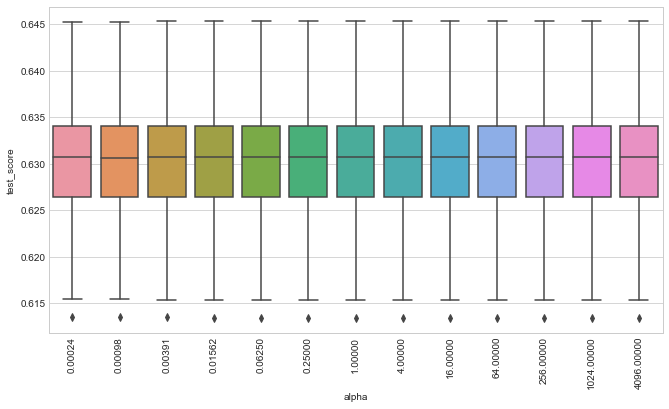

In [36]:
plot_performance(gcv)

### Kernel Survival Support Vector Machine (Not Implemented)

In [1]:
from sksurv.svm import FastKernelSurvivalSVM
from sksurv.kernels import clinical_kernel

In [11]:
kernel_matrix = clinical_kernel(data_train_x)
#kssvm = FastKernelSurvivalSVM(optimizer="rbtree", kernel="precomputed", random_state=0)
kssvm = FastKernelSurvivalSVM(optimizer="rbtree", kernel="rbf", random_state=0)

In [12]:
param_grid = {'alpha': 2. ** np.arange(-12, 13, 5)}
cv = ShuffleSplit(n_splits=5, test_size=0.5, random_state=0)
kgcv = GridSearchCV(kssvm, param_grid, score_survival_model,
                    n_jobs=10, iid=False, refit=False,
                    cv=cv, verbose=100)

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
kgcv = kgcv.fit(kernel_matrix, data_train_y)

kgcv.best_score_, kgcv.best_params

plot_performance(kgcv)

### Parametric Model

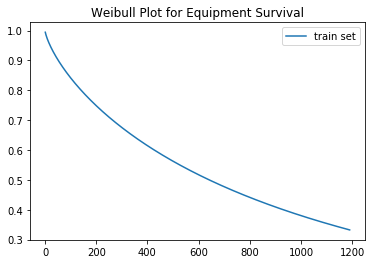

In [89]:
#Weibull plot is choosen
from lifelines import WeibullFitter
wbf=WeibullFitter()
wbf.fit(data_train["RunDays"], event_observed=data_train["Status"], label="train set")
wbf.survival_function_.plot(title='Weibull Plot for Equipment Survival')

Text(0.5,0,'time $t$')

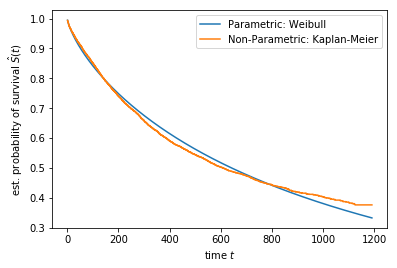

In [95]:
#Compare parametric and non-parametric model. Weibull is quite good fit
wbf.survival_function_.plot()
plt.step(time, survival_prob, where="post")
plt.legend(["Parametric: Weibull","Non-Parametric: Kaplan-Meier"])
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")